# Offset Curves along a parametric curve
# - using Matplotlib, NumPy and scikit-vectors

Copyright (c) 2019 Tor Olav Kristensen, http://subcube.com

https://github.com/t-o-k/scikit-vectors

Use of this source code is governed by a BSD-license that can be found in the LICENSE file.

In [1]:
url = 'https://github.com/t-o-k/scikit-vectors_examples/'

In [2]:
# This example has been tested with NumPy v1.13.3, Matplotlib v2.1.1 and Jupyter v4.4.0.

In [3]:
# Uncomment one of these to get a Matplotlib backend with interactive plots 

# %matplotlib auto
# %matplotlib notebook

In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import numpy as np

from skvectors import create_class_Cartesian_2D_Vector

In [5]:
# Size and resolution for Matplotlib figures

figure_size = (8, 8)
figure_dpi = 100

In [6]:
# Trefoil knot in 2D

def f_x(t):

    r = np.sqrt(2 + np.sqrt(3))

    return r * np.cos(2 * t - 3 / 2 * np.pi) - np.sin(t)


def f_y(t):

    r = np.sqrt(2 + np.sqrt(3))

    return r * np.sin(2 * t - 3 / 2 * np.pi) - np.cos(t)

In [7]:
no_of_points_along_curve = 3 * 2**8 + 1

In [8]:
# Necessary NumPy functions

np_functions = \
    {
        'not': np.logical_not,
        'and': np.logical_and,
        'or': np.logical_or,
        'all': np.all,
        'any': np.any,
        'min': np.minimum,
        'max': np.maximum,
        'abs': np.absolute,
        'trunc': np.trunc,
        'ceil': np.ceil,
        'copysign': np.copysign,
        'log10': np.log10,
        'cos': np.cos,
        'sin': np.sin,
        'atan2': np.arctan2,
        'pi': np.pi
    }

In [9]:
# Create a vector class that can hold all the points along the curve

NP2 = \
    create_class_Cartesian_2D_Vector(
        name = 'NP2',
        component_names = 'xy',
        brackets = '<>',
        sep = ', ',
        cnull = np.zeros(no_of_points_along_curve),
        cunit = np.ones(no_of_points_along_curve),
        functions = np_functions
    )

In [10]:
# Calculate the points along the curve

angles_along_curve = np.linspace(0, 2*np.pi, no_of_points_along_curve, endpoint=True) + np.pi

p_o = \
    NP2(
        x = f_x(angles_along_curve),
        y = f_y(angles_along_curve)
    )

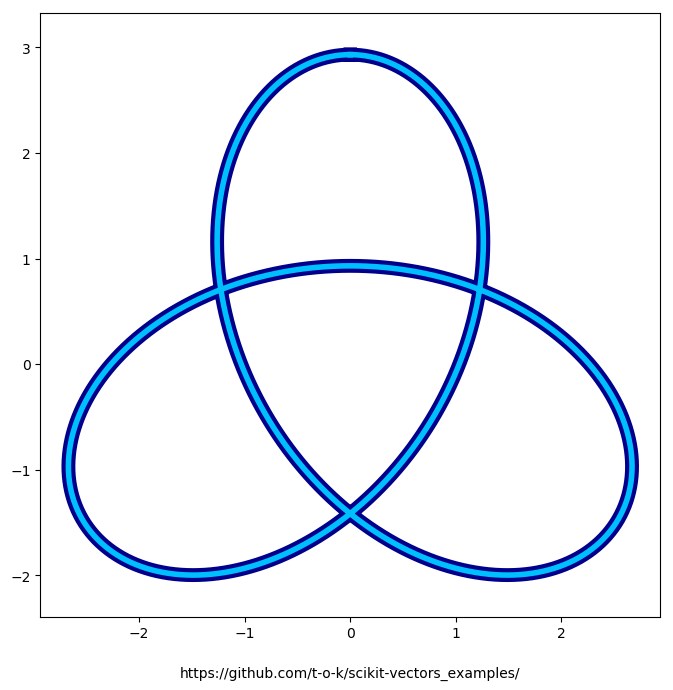

In [11]:
# Show the curve by drawing a line above a thicker line

fig, ax = plt.subplots(figsize=figure_size, dpi=figure_dpi)
fig.text(0.30, 0.05, url)
ax.plot(p_o.x, p_o.y, color='darkblue', linewidth=10)
ax.plot(p_o.x, p_o.y, color='deepskyblue', linewidth=4)
ax.axis('equal')
plt.show()

In [12]:
# Numerical approximation of the first derivative of a univariate function

def first_derivative(fn, h=1e-4):

    h2 = 2 * h


    def d1_fn(t):

        return (fn(t + h) - fn(t - h)) / h2


    return d1_fn

In [13]:
# Create derivative functions for the curve

d1_f_x = first_derivative(f_x)
d1_f_y = first_derivative(f_y)

In [14]:
# Calculate vectors from the first derivatives at the points along the curve

v_d1 = \
    NP2(
        x = d1_f_x(angles_along_curve),
        y = d1_f_y(angles_along_curve)
    )

In [15]:
# Calculate tangent vectors at the points along the curve

v_t = v_d1.normalize()

In [16]:
# Calculate normal vectors at the points along the curve

v_n = v_t.perp()

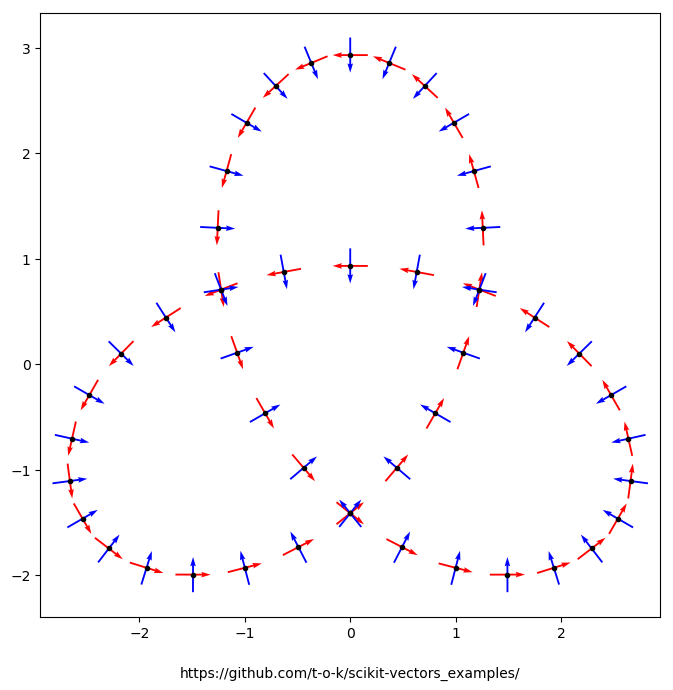

In [17]:
# Show some of the tangent vectors (red) and the normal vectors (blue) along the curve

s = 16  # stride

sl = slice(None, -1, s)

fig, ax = plt.subplots(figsize=figure_size, dpi=figure_dpi)
fig.text(0.30, 0.05, url)
ax.quiver(
    p_o.x[sl], p_o.y[sl],
    v_t.x[sl], v_t.y[sl],
    width = 0.003,
    color = 'red',
    scale = 3, 
    scale_units = 'xy',
    pivot = 'middle'
)
ax.quiver(
    p_o.x[sl], p_o.y[sl],
    v_n.x[sl], v_n.y[sl],
    width = 0.003,
    color = 'blue',
    scale = 3, 
    scale_units = 'xy',
    pivot = 'middle'
)
ax.scatter(
    p_o.x[sl], p_o.y[sl],
    color = 'black',
    marker = '.'
)
ax.axis('equal')
plt.show()

In [18]:
# Calculate points for two offset curves

d = 0.1

p_dm = p_o - d * v_n
p_dp = p_o + d * v_n

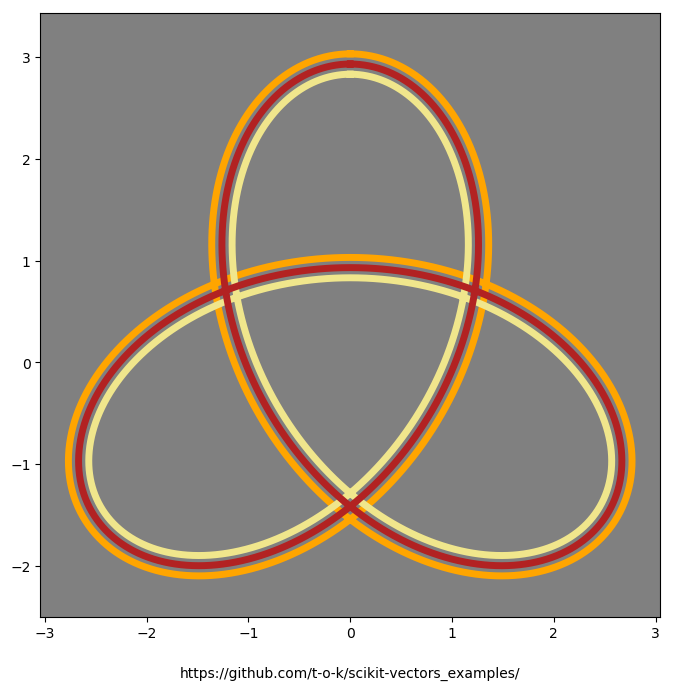

In [19]:
# Show the curve together with the two offset curves

lw = 5

fig, ax = plt.subplots(figsize=figure_size, dpi=figure_dpi)
fig.text(0.30, 0.05, url)
ax.plot(*p_dm, c='orange', linewidth=lw)
ax.plot(*p_dp, c='khaki', linewidth=lw)
ax.plot(*p_o, c='firebrick', linewidth=lw)
ax.set_facecolor('gray')
ax.axis('equal')
plt.show()

In [20]:
# Prepare for plotting with quad patches (between pairs of offset curves) instead of lines

def Patches(p_e, p_f, color='black'):

    no_of_points = len(p_e.cnull)

    return \
        [
            Polygon(
                [
                    [ p_e.x[j], p_e.y[j] ],
                    [ p_f.x[j], p_f.y[j] ],
                    [ p_f.x[k], p_f.y[k] ],
                    [ p_e.x[k], p_e.y[k] ]
                ],
                closed = True,
                color = color
            )
            for j, k in zip(range(0, no_of_points-1), range(1, no_of_points))
        ]

In [21]:
# Calculate points for the offset curves

d = 0.04
p_cm = p_o - d * v_n
p_cp = p_o + d * v_n

a = 2 * d
p_am = p_o - a * v_n
p_ap = p_o + a * v_n

b = 4 * d
p_bm = p_o - b * v_n
p_bp = p_o + b * v_n

In [22]:
# Create the patches

patches_outer = Patches(p_am, p_bm)
patches_inner = Patches(p_ap, p_bp)
patches_center = Patches(p_cm, p_cp)

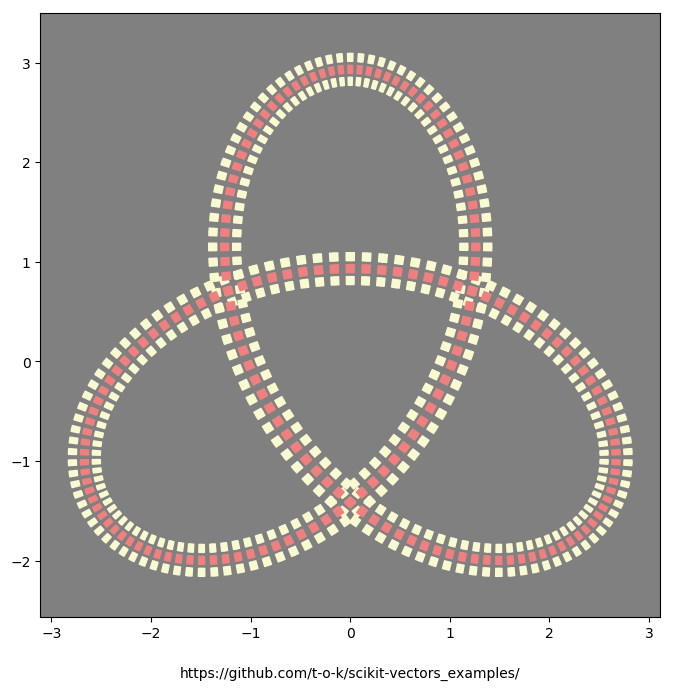

In [23]:
# Show every second of the patches along the curves

s = 2

sl1 = slice(None, 1 - s * 2, s * 2)
sl2 = slice(s * 2 - 1, None, s * 2)

fig, ax = plt.subplots(figsize=figure_size, dpi=figure_dpi)
fig.text(0.30, 0.05, url)
ax.add_collection(
    PatchCollection(
        patches_inner[sl1],
        # match_original = True,
        color = 'lightgoldenrodyellow'
    )
)
ax.add_collection(
    PatchCollection(
        patches_inner[sl2],
        # match_original = True,
        color = 'lightgoldenrodyellow'
    )
)
ax.add_collection(
    PatchCollection(
        patches_outer[sl1],
        # match_original = True,
        color = 'lightgoldenrodyellow'
    )
)
ax.add_collection(
    PatchCollection(
        patches_outer[sl2],
        # match_original = True,
        color ='lightgoldenrodyellow'
    )
)
ax.add_collection(
    PatchCollection(
        patches_center[sl1],
        # match_original = True,
        color = 'lightcoral'
    )
)
ax.add_collection(
    PatchCollection(
        patches_center[sl2],
        # match_original = True,
        color = 'lightcoral'
    )
)
ax.set_facecolor('gray')
ax.axis('equal')
plt.show()

In [24]:
# Calculate points for more offset curves

# NB: The order of the operands in the first multiplication matters here
v_n_w = v_n * np.sin(12 * angles_along_curve)

d = 0.04
p_cm = p_o - d * v_n_w
p_cp = p_o + d * v_n_w

a = 2 * d
p_am = p_o - a * v_n_w
p_ap = p_o + a * v_n_w

b = 4 * d
p_bm = p_o - b * v_n_w
p_bp = p_o + b * v_n_w 

In [25]:
# Create more patches

patches_outer_w = Patches(p_am, p_bm)
patches_inner_w = Patches(p_ap, p_bp)
patches_center_w = Patches(p_cm, p_cp)

In [26]:
# Prepare values for choosing colors from a color map

phase_shift = np.pi / (no_of_points_along_curve - 1)
angles_for_color = 12 * (angles_along_curve + phase_shift)
values_for_color = (np.cos(angles_for_color) + 1) / 2

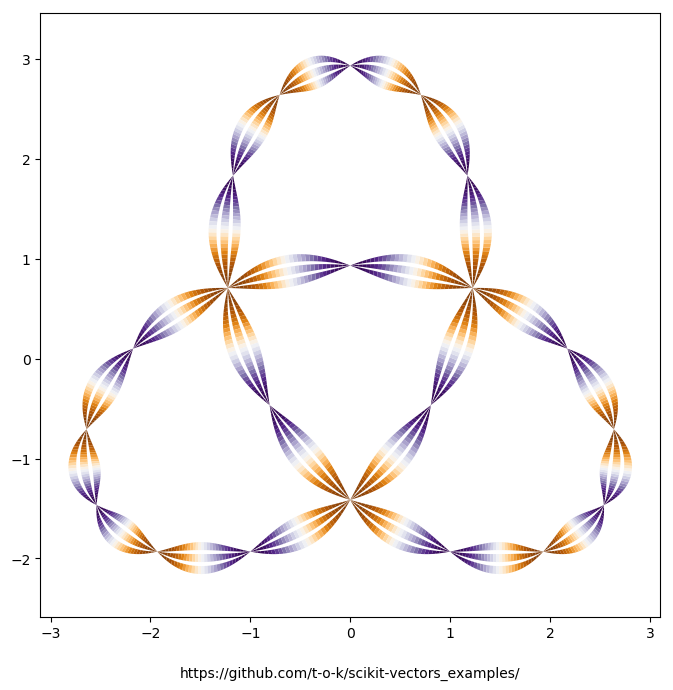

In [27]:
# Show the curves with colors cycling

fig = plt.figure(figsize=figure_size, dpi=figure_dpi)
fig.text(0.30, 0.05, url)
ax = fig.add_subplot(1, 1, 1)
ax.add_collection(
    PatchCollection(
        patches_inner_w,
        array = values_for_color,
        cmap = plt.cm.PuOr
    )
)
ax.add_collection(
    PatchCollection(
        patches_outer_w,
        array = values_for_color,
        cmap = plt.cm.PuOr
    )
)
ax.add_collection(
    PatchCollection(
        patches_center_w,
        array = values_for_color,
        cmap = plt.cm.PuOr
    )
)
# ax.set_facecolor('grey')
ax.axis('equal')
plt.show()

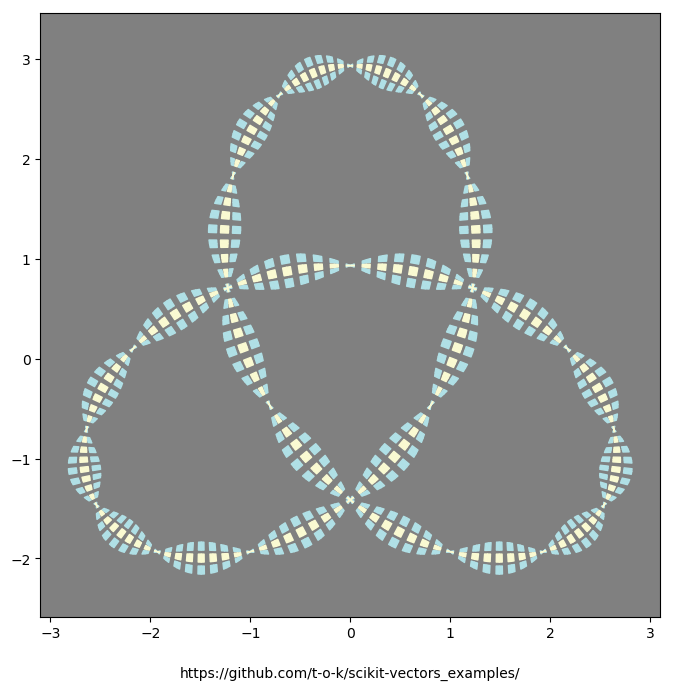

In [28]:
# Show every second of the patches along the curves

s = 2

sl1 = slice(None, 1 - s * 2, s * 2)
sl2 = slice(s * 2 - 1, None, s * 2)

fig, ax = plt.subplots(figsize=figure_size, dpi=figure_dpi)
fig.text(0.30, 0.05, url)
ax.add_collection(
    PatchCollection(
        patches_inner_w[sl1],
        color = 'powderblue'
    )
)
ax.add_collection(
    PatchCollection(
        patches_inner_w[sl2],
        color = 'powderblue'
    )
)
ax.add_collection(
    PatchCollection(
        patches_outer_w[sl1],
        color = 'powderblue'
    )
)
ax.add_collection(
    PatchCollection(
        patches_outer_w[sl2],
        color = 'powderblue'
    )
)
ax.add_collection(
    PatchCollection(
        patches_center_w[sl1],
        color = 'lightgoldenrodyellow'
    )
)
ax.add_collection(
    PatchCollection(
        patches_center_w[sl2],
        color = 'lightgoldenrodyellow'
    )
)
ax.set_facecolor('grey')
ax.axis('equal')
plt.show()